In [5]:
import math, time, random, datetime

In [24]:
import numpy as np
import pandas as pd
import missingno

In [31]:
import catboost

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [14]:
train = pd.read_csv(r"C:\Users\patri\Downloads\titanic\train.csv")
test = pd.read_csv(r"C:\Users\patri\Downloads\titanic\test.csv")
gender_submission = pd.read_csv(r"C:\Users\patri\Downloads\titanic\gender_submission.csv")

In [15]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [17]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [18]:
len(train)

891

In [19]:
len(test)

418

In [20]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

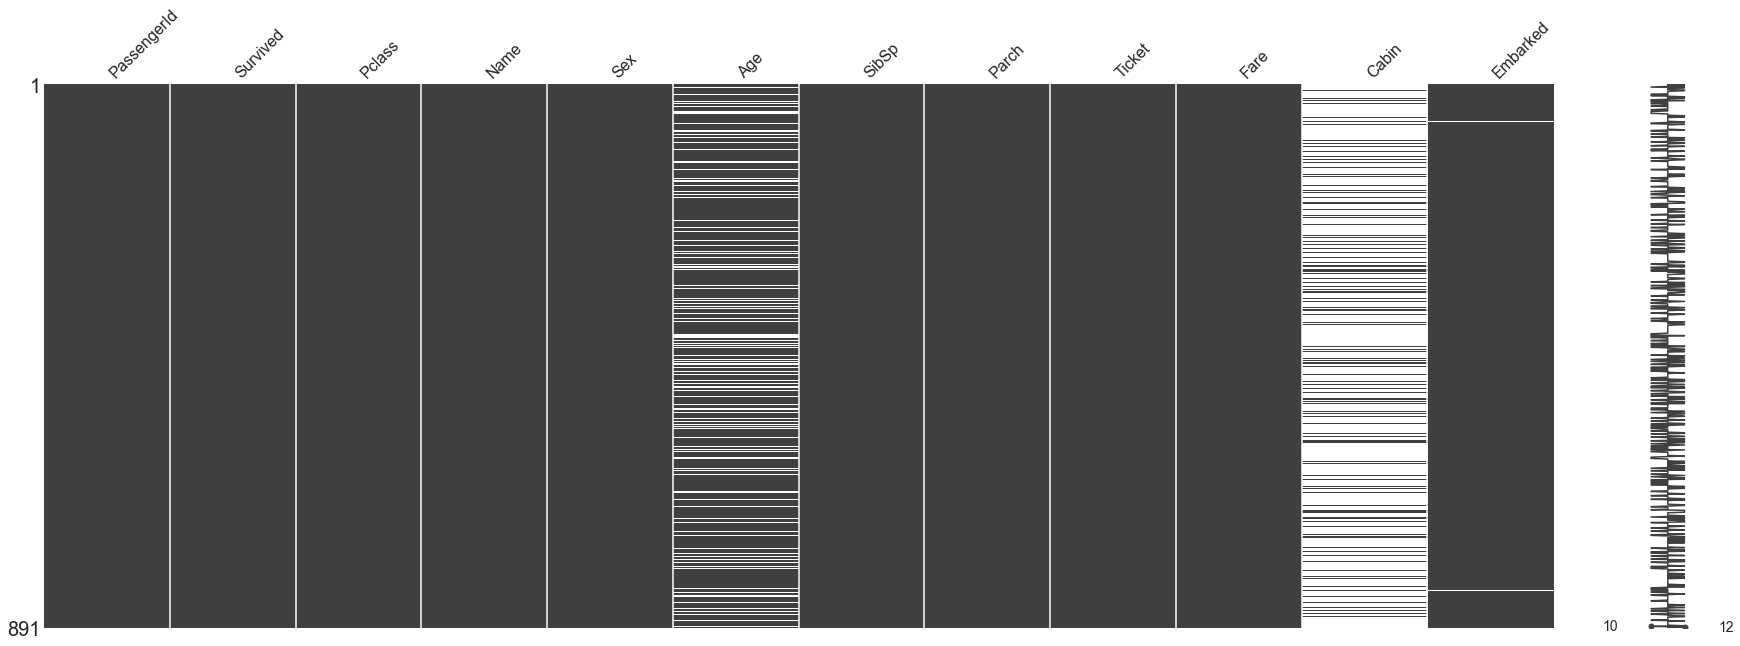

In [33]:
missingno.matrix(train, figsize = (30,10)) #find missing values----age and cabin 

In [34]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
# function to see the missing values

def find_missing_values(df,columns):
    missing_vals = {}
    print("Number of missing or NaN values for each column:")
    df_length = len(df)
    for column in columns:
        total_column_values = df[column].value_counts().sum()
        missing_vals[column] = df_length-total_column_values
    return missing_vals

missing_values = find_missing_values(train, columns=train.columns)
missing_values

Number of missing or NaN values for each column:


{'PassengerId': 0,
 'Survived': 0,
 'Pclass': 0,
 'Name': 0,
 'Sex': 0,
 'Age': 177,
 'SibSp': 0,
 'Parch': 0,
 'Ticket': 0,
 'Fare': 0,
 'Cabin': 687,
 'Embarked': 2}

In [40]:
df_bin = pd.DataFrame()#discretised continous variable
df_con = pd.DataFrame()#continuous variable

In [41]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

0    549
1    342
Name: Survived, dtype: int64


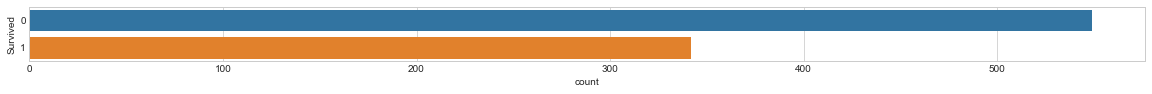

In [42]:
# 0=did not survive, 1=survive

fig = plt.figure(figsize=(20,1))
sns.countplot(y='Survived',data=train)
print(train.Survived.value_counts())

In [43]:
#add to subset df

df_bin['Survived'] = train['Survived']
df_con['Survived'] = train['Survived']

In [45]:
df_bin.head()

,Survived
0,0
1,1
2,1
3,1
4,0


<AxesSubplot:xlabel='Pclass', ylabel='Density'>

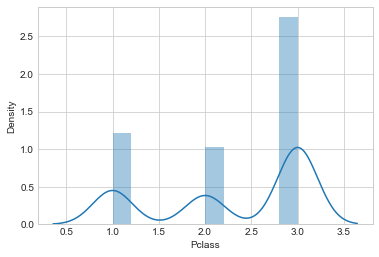

In [46]:
#ticket class of the passenger to understand spread of the dataset

sns.distplot(train['Pclass'])

In [47]:
df_bin['Pclass'] = train['Pclass']
df_con['Pclass'] = train['Pclass']


In [48]:
# names of the passengers--first 20

train.Name.value_counts()[:20]

Larsson, Mr. Bengt Edvin                        1
Slabenoff, Mr. Petco                            1
Harris, Mrs. Henry Birkhardt (Irene Wallach)    1
Eitemiller, Mr. George Floyd                    1
Mitkoff, Mr. Mito                               1
Frolicher-Stehli, Mr. Maxmillian                1
Bowen, Mr. David John "Dai"                     1
Daly, Mr. Peter Denis                           1
Davidson, Mr. Thornton                          1
Andersson, Miss. Erna Alexandra                 1
Olsen, Mr. Karl Siegwart Andreas                1
Culumovic, Mr. Jeso                             1
Goodwin, Miss. Lillian Amy                      1
Jussila, Miss. Katriina                         1
Skoog, Miss. Mabel                              1
Carter, Rev. Ernest Courtenay                   1
Kelly, Mrs. Florence "Fannie"                   1
McCoy, Mr. Bernard                              1
Dahlberg, Miss. Gerda Ulrika                    1
Caldwell, Master. Alden Gates                   1


<AxesSubplot:xlabel='count', ylabel='Sex'>

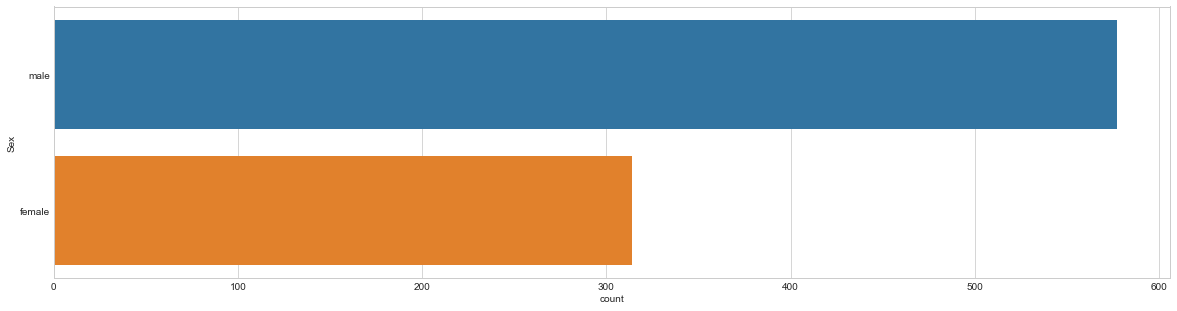

In [50]:
plt.figure(figsize=(20,5))
sns.countplot(y="Sex", data=train)

In [51]:
df_bin['Sex'] = train['Sex']

df_bin['Sex'] = np.where(df_bin['Sex'] =='female',1,0)

df_con['Sex'] = train['Sex']

<AxesSubplot:xlabel='Sex', ylabel='Density'>

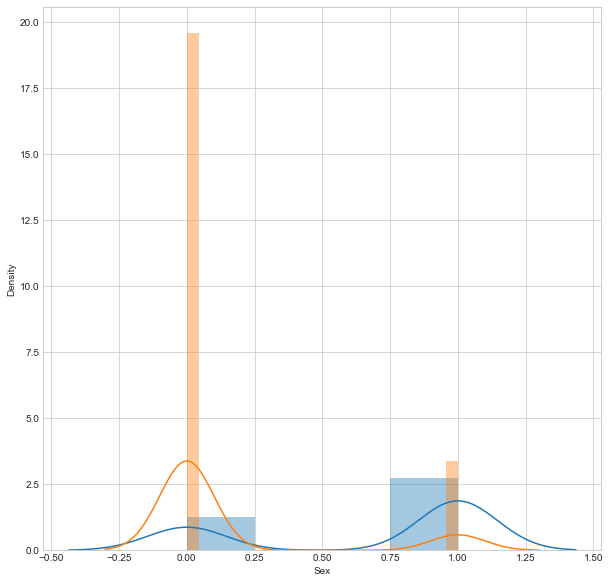

In [52]:
#sex column variable compared to survival using binarys

fig = plt.figure(figsize =(10,10))
sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['Sex'], kde_kws={'label':'Survived'})
sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Sex'], kde_kws={'label':'Did not Survive'})

In [89]:
def plot_count_dist(data, bin_df, label_column, target_column,figsize=(20,5),use_bin_df=False):

    if use_bin_df:
        fig =plt.figure(figsize=figsize)
        plt.subplot(1,2,2)
        sns.countplot(y=target_column, data=bin_df)
        plt.subplot(1,2,2)
        sns.distplot(data.loc[data[label_column]==1][target_column],kde_kws={'label':'Survived'})
        sns.distplot(data.loc[data[label_column]==0][target_column],kde_kws={'label':'Did not Survive'})
            
    else:
        fig =plt.figure(figsize=figsize)
        plt.subplot(1,2,1)
        sns.countplot(y=target_column, data=data)
        plt.subplot(1,2,2)
        sns.distplot(data.loc[data[label_column]==1][target_column],kde_kws={'label':'Survived'})
        sns.distplot(data.loc[data[label_column]==0][target_column],kde_kws={'label':'Did not Survive'})

In [62]:
train.SibSp.value_counts()#check the values

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [63]:
#add sibsp to subset df

df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

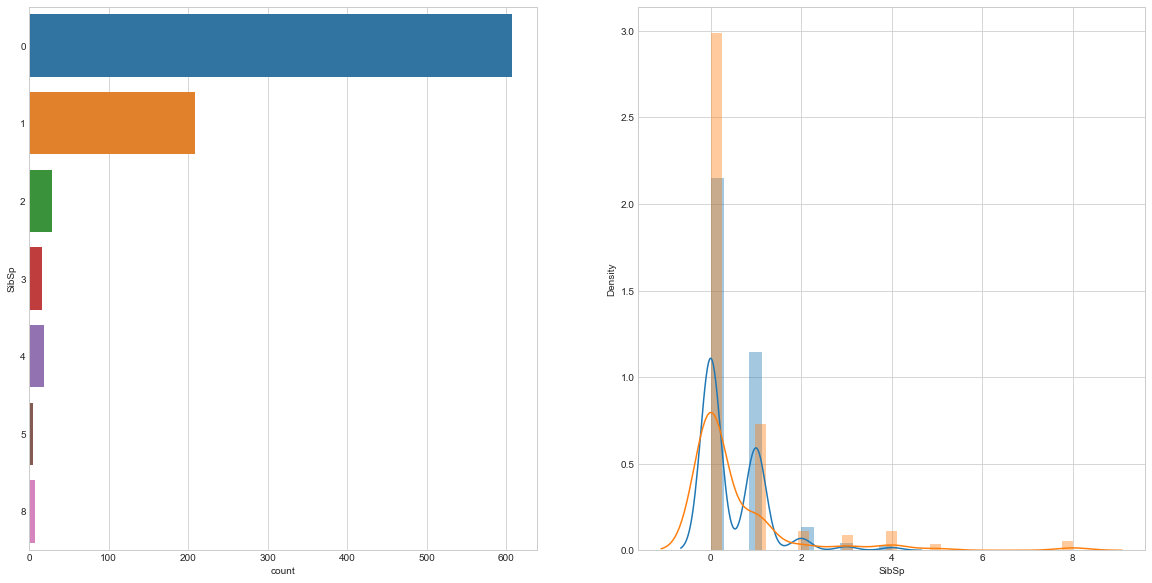

In [65]:
#visualize the counts of sibsp and the distribution of the values---against survived

plot_count_dist(train,
               bin_df=df_bin,
               label_column='Survived',
               target_column='SibSp',
               figsize=(20,10))

In [66]:
train.Parch.value_counts()#check the values

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [67]:
df_bin['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']

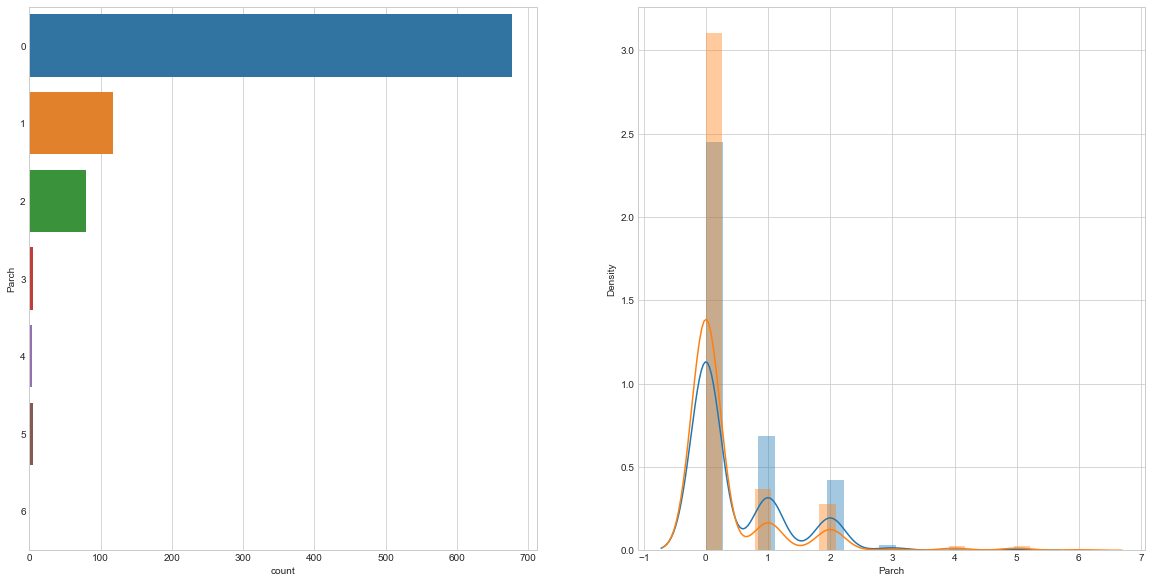

In [68]:
#visualize counts of parch and the distribution of the values--against survived

plot_count_dist(train,
               bin_df=df_bin,
               label_column='Survived',
               target_column='Parch',
               figsize=(20,10))

In [69]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch
0,0,3,male,1,0
1,1,1,female,1,0
2,1,3,female,0,0
3,1,1,female,1,0
4,0,3,male,0,0


In [72]:
# how many types of tickets
train.Ticket.value_counts()[:20]

CA. 2343        7
347082          7
1601            7
CA 2144         6
347088          6
3101295         6
382652          5
S.O.C. 14879    5
4133            4
2666            4
347077          4
W./C. 6608      4
113781          4
19950           4
PC 17757        4
349909          4
113760          4
LINE            4
17421           4
230080          3
Name: Ticket, dtype: int64

CA. 2343        7
347082          7
1601            7
CA 2144         6
347088          6
3101295         6
382652          5
S.O.C. 14879    5
4133            4
2666            4
347077          4
W./C. 6608      4
113781          4
19950           4
PC 17757        4
349909          4
113760          4
LINE            4
17421           4
230080          3
Name: Ticket, dtype: int64

In [78]:
# how many unique kinds of Ticket are there?

print("There are {} unique Ticket values!".format(len(train.Ticket.unique())))

There are 681 unique Ticket values!


In [79]:
#fare

train.Fare.dtype

dtype('float64')

In [81]:
print("There are {} unique Fare values".format(len(train.Fare.unique())))

There are 248 unique Fare values


In [85]:
df_bin['Fare'] = pd.cut(train['Fare'],bins=5)
df_con['Fare'] = train['Fare']

In [86]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,0,1,0,"(-0.512, 102.466]"
1,1,1,1,1,0,"(-0.512, 102.466]"
2,1,3,1,0,0,"(-0.512, 102.466]"
3,1,1,1,1,0,"(-0.512, 102.466]"
4,0,3,0,0,0,"(-0.512, 102.466]"


In [87]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,male,1,0,7.2500
1,1,1,female,1,0,71.2833
2,1,3,female,0,0,7.9250
3,1,1,female,1,0,53.1000
4,0,3,male,0,0,8.0500


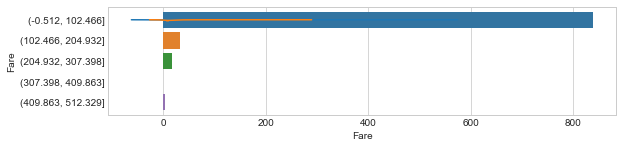

In [96]:
#plot fare vs survived

plot_count_dist(data=train,
               bin_df=df_bin,
               label_column='Survived',
               target_column='Fare',
               figsize=(20,2),
               use_bin_df=True)

In [94]:
df_bin.Fare.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

In [97]:
#missing values in cabin

missing_values['Cabin']

687

In [98]:
#cabin values

train.Cabin.value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
D              3
F2             3
              ..
C30            1
B79            1
C32            1
A26            1
E36            1
Name: Cabin, Length: 147, dtype: int64

In [99]:
missing_values['Embarked']

2

In [102]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Embarked'>

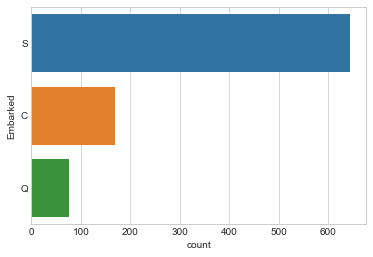

In [101]:
#what the count looks like

sns.countplot(y='Embarked',data=train)

In [103]:
#add to subset df

df_bin['Embarked'] = train['Embarked']
df_con['Embarked'] = train['Embarked']

In [104]:
#remove missing values from embark

print(len(df_con))
df_con = df_con.dropna(subset=['Embarked'])
df_bin = df_con.dropna(subset=['Embarked'])
print(len(df_con))

891
889


In [105]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


In [106]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


In [110]:
#one-hot encode binned variables

one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Survived')
df_bin_enc = pd.get_dummies(df_bin,columns=one_hot_cols)

df_bin_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Fare_211.5,Fare_221.7792,Fare_227.525,Fare_247.5208,Fare_262.375,Fare_263.0,Fare_512.3292,Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [111]:
df_con_enc =df_con.apply(LabelEncoder().fit_transform)

df_con_enc.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,2,1,1,0,18,2
1,1,0,0,1,0,207,0
2,1,2,0,0,0,41,2
3,1,0,0,1,0,189,2
4,0,2,1,0,0,43,2


In [112]:


selected_df = df_con_enc

In [113]:
#split the df into data and labels

x_train = selected_df.drop('Survived',axis=1)#data
y_train = selected_df.Survived#labels

In [114]:
x_train.shape

(889, 6)

In [115]:
y_train.shape

(889,)